<a href="https://colab.research.google.com/github/Curioussoul119/ML/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing tools
1. Importing the libraries
2. Importing the data set
3. Taking care of missing data
4. Encoding categorical data
5. Encoding the independent variable
6. Encoding of dependent variable
7 splitting the dataset into the training set and test set
8. Feature scaling

## 1.Importing the libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

1. Mounting google drive locally

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_setpath1= '/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/1 - Importing Datasets/dataset_1.data'

In [6]:
data_setpath2='/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/2 - Dealing with null values/car_dataset.data'

In [7]:
data_setpath3 ='/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/3 - Data Formatting _ Data Binning/car_dataset.data'

In [8]:
data_Setpath4='/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/4 - Dealing With Categorical Values/Salary_Dataset.csv'

In [9]:
data_setpath5='/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/5 - Splitting Datasets/Salary_Dataset_02.xls'

In [10]:
data_setpath6 = '/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/6 - Feature Scaling _ Data Normalization/Dataset_03.csv'

## 3. Taking care of missing data

In [11]:
data_setpath2

'/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/2 - Dealing with null values/car_dataset.data'

1.Dealing null values with pandas data frames

In [13]:
# These are the headers which you need to link to your dataset.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [17]:
df=pd.read_csv(data_setpath2, names=headers)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
# replace '?' to NaN
df.replace('?', np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make  ... city-mpg highway-mpg  price
0            3               NaN  alfa-romero  ...       21          27  13495
1            3               NaN  alfa-romero  ...       21          27  16500
2            1               NaN  alfa-romero  ...       19          26  16500
3            2               164         audi  ...       24          30  13950
4            2               164         audi  ...       18          22  17450
..         ...               ...          ...  ...      ...         ...    ...
200         -1                95        volvo  ...       23          28  16845
201         -1                95        volvo  ...       19          25  19045
202         -1                95        volvo  ...       18          23  21485
203         -1                95        volvo  ...       26          27  22470
204         -1                95        volvo  ...       19          25  22625

[205 rows x 26 colu

In [24]:
missing_data=df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
for column in headers:
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

"normalized-losses": 41 missing data
"num-of-doors": 2 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data
"price": 4 missing data

<h2 id="deal_missing_values">Deal with missing data</h2>
<br>
<h3>How to deal with missing data?</h3>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean
Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [26]:
avg_norm_loss= df['normalized-losses'].astype('float').mean(axis=0)
print('Average of normalized-losses:', avg_norm_loss)

Average of normalized-losses: 122.0


In [27]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

In [28]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print('Average of bore:', avg_bore)

Average of bore: 3.3297512437810957


In [40]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

In [42]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print("average of stroke:", avg_stroke)

average of stroke: 3.258353258582702


In [43]:
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [30]:
avg_horsepower =df['horsepower'].astype('float').mean(axis=0)
print('Average horsepower', avg_horsepower)

Average horsepower 104.25615763546799


In [31]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [32]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print('Average peak rpm:', avg_peakrpm)

Average peak rpm: 5125.369458128079


In [33]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Now we have done for replacing with mean.
Its time to replace null values with most frequent values
We will do this for num-of-doors column

In [34]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [35]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [36]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [37]:
#Finally, let's drop all rows that do not have price data:

In [38]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
#Lets Check It
missing_data=df.isnull()
missing_data.head(5)

for column in headers:
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [46]:
#LETS START LEARNING DATA FORMATING & DATA STANDARDIZATION.
#There you will learn how to correct the data types of each columns in proper way.

## Dealing null values with Scikit-Learn

In [47]:
import pandas as pd
import numpy as np

In [48]:
# These are the headers which you need to link to your dataset.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [49]:
df=pd.read_csv(data_setpath2, names= headers)

In [50]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [51]:
df.replace('?', np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [52]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
#True" stands for missing value. Count missing values in each column

In [54]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h2 id="deal_missing_values">Deal with missing data</h2>
<br>
<h3>How to deal with missing data?</h3>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
    </li>
</ol>

Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean
Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [55]:
# Let's do it Scikit-Learn

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(df[['normalized-losses','stroke','bore','horsepower','peak-rpm']])
df[['normalized-losses','stroke','bore','horsepower','peak-rpm']]=imputer.transform(df[['normalized-losses','stroke','bore','horsepower','peak-rpm']])

In [57]:
#Second deal with variable which needs to be replaced by most frequent value

imputer = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')
imputer.fit(df[['num-of-doors']])
df[['num-of-doors']] = imputer.transform(df[['num-of-doors']])

In [58]:
# Third drop the row having the price value missing

In [59]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [60]:
#Let's check it

In [61]:
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [62]:
df.info

<bound method DataFrame.info of      symboling  normalized-losses         make  ... city-mpg highway-mpg  price
0            3              122.0  alfa-romero  ...       21          27  13495
1            3              122.0  alfa-romero  ...       21          27  16500
2            1              122.0  alfa-romero  ...       19          26  16500
3            2              164.0         audi  ...       24          30  13950
4            2              164.0         audi  ...       18          22  17450
..         ...                ...          ...  ...      ...         ...    ...
196         -1               95.0        volvo  ...       23          28  16845
197         -1               95.0        volvo  ...       19          25  19045
198         -1               95.0        volvo  ...       18          23  21485
199         -1               95.0        volvo  ...       26          27  22470
200         -1               95.0        volvo  ...       19          25  22625

[201 ro

## 3. Data Formatting or Data-binning

In [63]:
# Let's start data formatting

In [66]:
to_float = ['bore','stroke','peak-rpm','price','normalized-losses','horsepower']
df[to_float] = df[to_float].astype('float')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Data Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

Text(0.5, 1.0, 'horsepower bins')

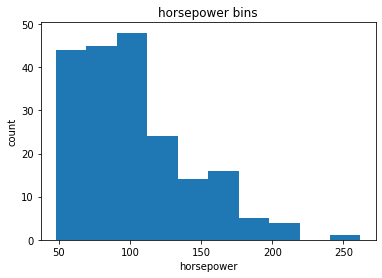

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.hist(df['horsepower'])

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

In [72]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [73]:
group_names = ['Low', 'Medium', 'High']

In [74]:
df['horsepower-binned']=pd.cut(df['horsepower'], bins, labels=group_names,include_lowest =True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [75]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

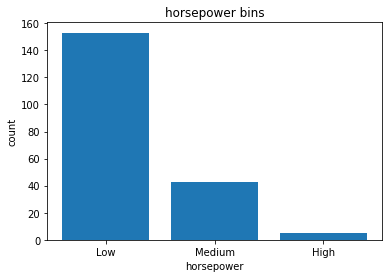

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

## 4. Dealing with categorical values

In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
dataset_path4=('/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/4 - Dealing With Categorical Values/Salary_Dataset.csv')

In [17]:
dataset = pd.read_csv(dataset_path4)

In [18]:
dataset.head(40)

,country,Salary,YearsExperience,Purchased
0,Dubai,39343.0,1.1,No
1,Canada,46205.0,1.3,Yes
2,Canada,37731.0,1.5,No
3,Canada,43525.0,2.0,No
4,USA,39891.0,2.2,No
5,Dubai,56642.0,2.9,No
6,Canada,60150.0,3.0,Yes
7,Australia,54445.0,3.2,No
8,Dubai,64445.0,3.2,Yes
9,Dubai,57189.0,3.7,No


## Let's perform encoding

In [8]:
#Applying ONE-HOT Encoding

In [21]:
# First do it with pandas
country_dummy=pd.get_dummies(dataset.country)

country_dummy

,Australia,Canada,Dubai,USA
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,1,0
6,0,1,0,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [22]:
dataset =pd.concat([dataset, country_dummy],axis = 1)

In [23]:
dataset

,country,Salary,YearsExperience,Purchased,Australia,Canada,Dubai,USA
0,Dubai,39343.0,1.1,No,0,0,1,0
1,Canada,46205.0,1.3,Yes,0,1,0,0
2,Canada,37731.0,1.5,No,0,1,0,0
3,Canada,43525.0,2.0,No,0,1,0,0
4,USA,39891.0,2.2,No,0,0,0,1
5,Dubai,56642.0,2.9,No,0,0,1,0
6,Canada,60150.0,3.0,Yes,0,1,0,0
7,Australia,54445.0,3.2,No,1,0,0,0
8,Dubai,64445.0,3.2,Yes,0,0,1,0
9,Dubai,57189.0,3.7,No,0,0,1,0


In [24]:
dataset.drop('country', axis = 1, inplace = True)

In [25]:
dataset

,Salary,YearsExperience,Purchased,Australia,Canada,Dubai,USA
0,39343.0,1.1,No,0,0,1,0
1,46205.0,1.3,Yes,0,1,0,0
2,37731.0,1.5,No,0,1,0,0
3,43525.0,2.0,No,0,1,0,0
4,39891.0,2.2,No,0,0,0,1
5,56642.0,2.9,No,0,0,1,0
6,60150.0,3.0,Yes,0,1,0,0
7,54445.0,3.2,No,1,0,0,0
8,64445.0,3.2,Yes,0,0,1,0
9,57189.0,3.7,No,0,0,1,0


In [26]:
dataset = dataset[['Australia','Canada', 'Dubai', 'USA', 'YearsExperience','Salary','Purchased' ]]
dataset

,Australia,Canada,Dubai,USA,YearsExperience,Salary,Purchased
0,0,0,1,0,1.1,39343.0,No
1,0,1,0,0,1.3,46205.0,Yes
2,0,1,0,0,1.5,37731.0,No
3,0,1,0,0,2.0,43525.0,No
4,0,0,0,1,2.2,39891.0,No
5,0,0,1,0,2.9,56642.0,No
6,0,1,0,0,3.0,60150.0,Yes
7,1,0,0,0,3.2,54445.0,No
8,0,0,1,0,3.2,64445.0,Yes
9,0,0,1,0,3.7,57189.0,No


## Let's do it with Scikit-Learn

In [7]:
# Restart your kernel if you are using same notebook
import pandas as pd
import numpy as np


In [8]:
dataset_path4 = ('/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/4 - Dealing With Categorical Values/Salary_Dataset.csv')


In [9]:
dataset = pd.read_csv(dataset_path4)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Purchased'] = le.fit_transform(dataset['Purchased'])
dataset['Purchased']

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    1
Name: Purchased, dtype: int64

In [13]:
# Let's perform one-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [15]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [17]:
df = pd.DataFrame(ct.fit_transform(dataset))
df

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,39343.0,1.1,0.0
1,0.0,1.0,0.0,0.0,46205.0,1.3,1.0
2,0.0,1.0,0.0,0.0,37731.0,1.5,0.0
3,0.0,1.0,0.0,0.0,43525.0,2.0,0.0
4,0.0,0.0,0.0,1.0,39891.0,2.2,0.0
5,0.0,0.0,1.0,0.0,56642.0,2.9,0.0
6,0.0,1.0,0.0,0.0,60150.0,3.0,1.0
7,1.0,0.0,0.0,0.0,54445.0,3.2,0.0
8,0.0,0.0,1.0,0.0,64445.0,3.2,1.0
9,0.0,0.0,1.0,0.0,57189.0,3.7,0.0


In [18]:
df.columns = ['Australia','Canada','Dubai','USA','Salary','YearsExperience','Purchased']

In [19]:
df.columns

Index(['Australia', 'Canada', 'Dubai', 'USA', 'Salary', 'YearsExperience',
       'Purchased'],
      dtype='object')

In [20]:
print(sorted(list(dataset['country'].unique())))

['Australia', 'Canada', 'Dubai', 'USA']


In [21]:
dataset.columns

Index(['country', 'Salary', 'YearsExperience', 'Purchased'], dtype='object')

In [22]:
dataset

,country,Salary,YearsExperience,Purchased
0,Dubai,39343.0,1.1,0
1,Canada,46205.0,1.3,1
2,Canada,37731.0,1.5,0
3,Canada,43525.0,2.0,0
4,USA,39891.0,2.2,0
5,Dubai,56642.0,2.9,0
6,Canada,60150.0,3.0,1
7,Australia,54445.0,3.2,0
8,Dubai,64445.0,3.2,1
9,Dubai,57189.0,3.7,0


## 5. Splitting of Dataset
Dividing into Target and predictor variables, Dividing data as Training Set and Testing Set

In [1]:
import pandas as pd
import numpy as np


In [4]:
dataset_path5='/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/5 - Splitting Datasets/Salary_Dataset_02.xls'

In [34]:
pip install --upgrade pandas


In [35]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
df = pd.read_excel(dataset_path5)

In [6]:
df.head()

,Australia,Canada,Dubai,USA,Salary,YearsExperience,Purchased
0,0,0,1,0,39343,1.1,0
1,0,1,0,0,46205,1.3,1
2,0,1,0,0,37731,1.5,0
3,0,1,0,0,43525,2.0,0
4,0,0,0,1,39891,2.2,0


In [7]:
df.info

<bound method DataFrame.info of     Australia  Canada  Dubai  USA  Salary  YearsExperience  Purchased
0           0       0      1    0   39343              1.1          0
1           0       1      0    0   46205              1.3          1
2           0       1      0    0   37731              1.5          0
3           0       1      0    0   43525              2.0          0
4           0       0      0    1   39891              2.2          0
5           0       0      1    0   56642              2.9          0
6           0       1      0    0   60150              3.0          1
7           1       0      0    0   54445              3.2          0
8           0       0      1    0   64445              3.2          1
9           0       0      1    0   57189              3.7          0
10          0       0      1    0   63218              3.9          1
11          0       0      0    1   55794              4.0          0
12          0       0      1    0   56957              4.0

In [8]:
# Dividing into Target and predictor variables
# X = Predictor variable(Mostly many features), y = Target variable(Mostly one feature)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X

,Australia,Canada,Dubai,USA,Salary,YearsExperience
0,0,0,1,0,39343,1.1
1,0,1,0,0,46205,1.3
2,0,1,0,0,37731,1.5
3,0,1,0,0,43525,2.0
4,0,0,0,1,39891,2.2
5,0,0,1,0,56642,2.9
6,0,1,0,0,60150,3.0
7,1,0,0,0,54445,3.2
8,0,0,1,0,64445,3.2
9,0,0,1,0,57189,3.7


In [10]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    1
Name: Purchased, dtype: int64

In [11]:
#X= df.iloc[:,:-1].values
#y= df.iloc[:,-1].values

## Dividing Data as Training Set and Testing Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=90)

In [13]:
X_train

,Australia,Canada,Dubai,USA,Salary,YearsExperience
29,0,1,0,0,121872,10.5
6,0,1,0,0,60150,3.0
20,0,1,0,0,91738,6.8
23,1,0,0,0,113812,8.2
25,1,0,0,0,105582,9.0
14,1,0,0,0,61111,4.5
8,0,0,1,0,64445,3.2
22,1,0,0,0,101302,7.9
15,0,0,0,1,67938,4.9
21,1,0,0,0,98273,7.1


In [14]:
X_train.shape

(24, 6)

In [15]:
X_test

,Australia,Canada,Dubai,USA,Salary,YearsExperience
17,0,1,0,0,83088,5.3
24,0,0,1,0,109431,8.7
26,0,0,1,0,116969,9.5
2,0,1,0,0,37731,1.5
1,0,1,0,0,46205,1.3
12,0,0,1,0,56957,4.0


In [16]:
X_test.shape

(6, 6)

In [17]:
y_train

29    1
6     1
20    0
23    1
25    1
14    0
8     1
22    0
15    0
21    0
9     0
13    0
16    0
19    0
11    0
0     0
10    1
28    0
5     0
4     0
7     0
3     0
18    1
27    1
Name: Purchased, dtype: int64

In [18]:
y_test

17    0
24    0
26    0
2     0
1     1
12    1
Name: Purchased, dtype: int64

## 6. Feature Scaling


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path6 = '/content/drive/MyDrive/ML Projects Bundle/Additional Material/Data Preprocessing Templates R_27.07.21/6 - Feature Scaling _ Data Normalization/Dataset_03.csv'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df =pd.read_csv(dataset_path6)

In [5]:
df.head()

,Australia,Canada,Dubai,USA,Salary,YearsExperience,Purchased
0,0,0,1,0,39343,1.1,0
1,0,1,0,0,46205,1.3,1
2,0,1,0,0,37731,1.5,0
3,0,1,0,0,43525,2.0,0
4,0,0,0,1,39891,2.2,0


In [16]:
X= df.iloc[:,:-1]

In [7]:
y = pd.df.iloc[:,-1]

In [8]:
X.shape

(30, 6)

In [9]:
y.shape

(30,)

In [10]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    1
24    0
25    1
26    0
27    1
28    0
29    1
Name: Purchased, dtype: int64

## Splitting Dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1)

## Perform Feature Scaling

In [40]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
# Creating Instance of StandardScaler
sc = StandardScaler()
# Perform scaling in X_train with fit_transform.
# here we are applying fit_transform because, 
  # Fit will calculate mean and standard deviation of X_train
  # Transform will actually perform scaling with calculated mean and std.
  # fit_transform method does this both thing in one line of code.
X_train.iloc[:,4:] = sc.fit_transform(X_train.iloc[:,4:])

# Here we will only use transform because we have already calculated mean and standard deviation
# Another reason is we dont want to know the mean and std of our test dataset
# As it leads to information leakage.
X_test.iloc[:,4:] = sc.transform(X_test.iloc[:,4:])

In [41]:
X_train

,Australia,Canada,Dubai,USA,Salary,YearsExperience
26,0,0,1,0,1.461305,1.391080
3,0,1,0,0,-1.067603,-1.058963
24,0,0,1,0,1.201748,1.129742
22,1,0,0,0,0.921841,0.868404
23,1,0,0,0,1.352600,0.966406
4,0,0,0,1,-1.192733,-0.993629
2,0,1,0,0,-1.267108,-1.222299
25,1,0,0,0,1.069215,1.227744
6,0,1,0,0,-0.495152,-0.732291
18,1,0,0,0,0.235279,0.215059


In [42]:
X_test

,Australia,Canada,Dubai,USA,Salary,YearsExperience
17,0,1,0,0,0.081308,-0.259161
21,1,0,0,0,1.115941,1.295803
10,0,0,1,0,-1.272538,-1.468576
19,0,1,0,0,0.820711,0.345547
14,1,0,0,0,-1.416099,-0.950255
20,0,1,0,0,0.670677,1.036642
